# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import os
import zipfile
import seaborn as sns
import scipy.stats as stats

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

<br>Take the latest data from 2019. Download the zipfile to directory `data`.<br>
Remark: salary data in this dataset is updated to 2016

In [2]:
url = 'https://github.com/chadwickbureau/baseballdatabank/archive/master.zip'
file = requests.get(url)
if not os.path.exists('data'):
    os.makedirs('data')
open('data/master.zip', 'wb').write(file.content)

9512657

Extract all files in the downloaded zipfile.

In [3]:
with zipfile.ZipFile('data/master.zip', 'r') as zip:
    zip.extractall('data')

Read csv files `Salaries.csv' and 'Teams.csv' into Pandas dataframes.

In [4]:
# find location of both files
for root, dirs, files in os.walk('data'):
    if 'Salaries.csv' in files:
        salaries_file = os.path.join(root, 'Salaries.csv')
print(salaries_file)
salaries_df = pd.read_csv(salaries_file)
# There are 2 Teams.csv files. The one we need is located in the same directory as Salaries.csv
data_dir = os.path.dirname(salaries_file)
for root, dirs, files in os.walk(data_dir):
    if 'Teams.csv' in files:
        teams_file = os.path.join(root, 'Teams.csv')
print(teams_file)
teams_df = pd.read_csv(teams_file)

data\baseballdatabank-master\core\Salaries.csv
data\baseballdatabank-master\core\Teams.csv


The head of Salaries dataframe

In [5]:
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


And the head of Teams dataframe

In [6]:
print('There are',teams_df['teamID'].nunique(), 'teams')
print(teams_df[teams_df['teamID'] == 'OAK'].head())
teams_df.head()

There are 149 teams
      yearID lgID teamID franchID divID  Rank    G  Ghome    W   L  ...   DP  \
1511    1968   AL    OAK      OAK   NaN     6  163   83.0   82  80  ...  136   
1533    1969   AL    OAK      OAK     W     2  162   81.0   88  74  ...  162   
1558    1970   AL    OAK      OAK     W     2  162   81.0   89  73  ...  152   
1582    1971   AL    OAK      OAK     W     1  161   81.0  101  60  ...  157   
1606    1972   AL    OAK      OAK     W     1  155   77.0   93  62  ...  146   

         FP               name              park  attendance  BPF  PPF  \
1511  0.976  Oakland Athletics  Oakland Coliseum    837466.0   94   94   
1533  0.978  Oakland Athletics  Oakland Coliseum    778232.0   95   95   
1558  0.977  Oakland Athletics  Oakland Coliseum    778355.0   97   95   
1582  0.981  Oakland Athletics  Oakland Coliseum    914993.0   98   97   
1606  0.979  Oakland Athletics  Oakland Coliseum    921323.0   95   93   

      teamIDBR  teamIDlahman45  teamIDretro  
1511    

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [7]:
#grouped_salaries_team_year = salaries_df.groupby(['teamID', 'yearID']).sum()
# identical to below
grouped_salaries_team_year = salaries_df.groupby(['teamID', 'yearID']).sum()[['salary']]
grouped_salaries_team_year.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

First get the columns of both dataframes:

In [8]:
print(salaries_df.columns)
#Which column represents the wins?
print(teams_df.columns)

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')
Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')


As we already have the `salaries` per team per year, we need to sum the `wins` per team per year before combining into a new dataframe.

In [9]:
#grouped_salaries_team_year = salaries_df.groupby(['teamID', 'yearID']).sum()[['salary']]
grouped_wins_team_year = teams_df.groupby(['teamID', 'yearID']).sum()[['W']]
print(grouped_wins_team_year.head())
salaries_wins_team_year = pd.merge(grouped_salaries_team_year, grouped_wins_team_year, how='inner', on = ['teamID', 'yearID'])
salaries_wins_team_year.head()

                W
teamID yearID    
ALT    1884     6
ANA    1997    84
       1998    85
       1999    70
       2000    82


salary   W
teamID yearID              
ANA    1997    31135472  84
       1998    41281000  85
       1999    55388166  70
       2000    51464167  82
       2001    47535167  75

#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

<br>See idea for plot in raw sketch below:<br>
![](data/HW1-Problem1d-idea.JPG)
How to handle Y-axis having different scales? <br><br>
First we have to set the index to access `teamID` for each year.

In [10]:
# To access teamID's for each year we need to set the index
salaries_wins_team_year.reset_index(inplace = True)
print(salaries_wins_team_year)
salaries_wins_team_year.head()

    teamID  yearID     salary   W
0      ANA    1997   31135472  84
1      ANA    1998   41281000  85
2      ANA    1999   55388166  70
3      ANA    2000   51464167  82
4      ANA    2001   47535167  75
..     ...     ...        ...  ..
913    WAS    2012   80855143  98
914    WAS    2013  113703270  86
915    WAS    2014  131983680  96
916    WAS    2015  155587472  83
917    WAS    2016  141652646  95

[918 rows x 4 columns]


,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


In [11]:
#Find Oakland OAK
oak = salaries_wins_team_year[salaries_wins_team_year['teamID'] == 'OAK']
print(oak.yearID.values)

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


As a start plot the Wins and Salaries lines for the entire period.

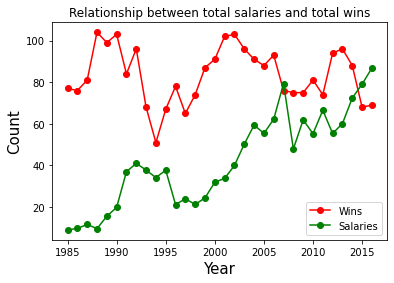

In [12]:
# Y-axis Salaries divided by 1000000
plt.plot(oak.yearID.values,oak.W.values, color='red', marker='o', label='Wins')
plt.plot(oak.yearID.values,oak.salary.values/1000000, color='green', marker='o', label='Salaries')
plt.title('Relationship between total salaries and total wins')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()
plt.show()

However the above plot does not show the relations with the other teams. Plotting both lines of all teams makes it a mess and useless. Furthermore the Y-axis is problematic as it represents both wins and salaries (in M$). Better to make scatter plots per year with Y-axis the wins and X-axis the salary. Each point represents a team and is plotted as a circle except for team Oakland that is plotted as a triangle_up marker (resemblance to an oak tree).<br><br>
Due to [markersymbol problem](https://stackoverflow.com/questions/41099887/conditional-marker-matplotlib) couldn't use this function:
```python
def plotYear(year):
    relevant_year = salaries_wins_team_year[salaries_wins_team_year['yearID']  == year]
    relevant_salaries = relevant_year['salary'].values
    relevant_wins = relevant_year['W'].values
    relevant_teams = relevant_year['teamID'].values
    colour=['r' if t == 'OAK' else 'b' for t in relevant_teams]
    marker_symbol=['^' if t == 'OAK' else 'o' for t in relevant_teams] 
    plt.scatter(relevant_salaries/1000000, relevant_wins, c=colour, marker=marker_symbol, s=150, alpha=0.6, edgecolors='none')
    plt.title('Salaries vs Wins in '+str(year))
    plt.xlabel('Salaries (M$)', fontsize=15)
    plt.ylabel('Wins', fontsize=15)
```
Unlike with colours a list of markers seems not to be recognized. The solution is to iterate over each point separately.


In [13]:
# Function to plot one year
def plotYear(year):
    relevant_year = salaries_wins_team_year[salaries_wins_team_year['yearID']  == year]
    relevant_salaries = relevant_year['salary'].values
    relevant_wins = relevant_year['W'].values
    relevant_teams = relevant_year['teamID'].values
    for i in range(relevant_salaries.size):
        colour = 'darkgreen' if relevant_teams[i] == 'OAK' else 'lightblue'
        marker_symbol = '^' if relevant_teams[i] == 'OAK' else 'o'
        plt.scatter(relevant_salaries[i]/1000000, relevant_wins[i], c=colour, marker=marker_symbol, s=150, alpha=0.6, edgecolors='none')
    plt.title('Salaries vs Wins in '+str(year))
    plt.xlabel('Salaries (M$)', fontsize=15)
    plt.ylabel('Wins', fontsize=15)

    

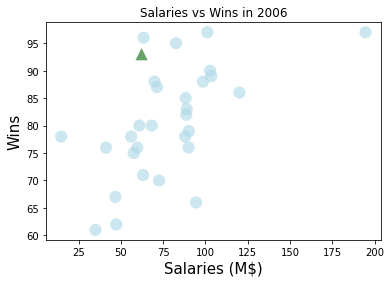

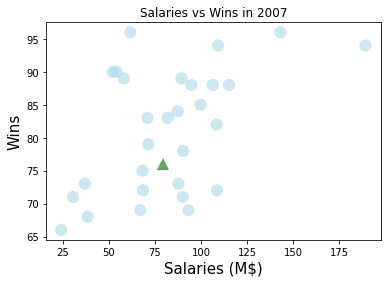

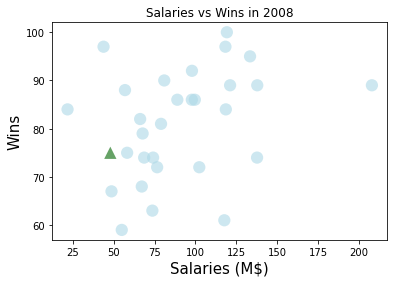

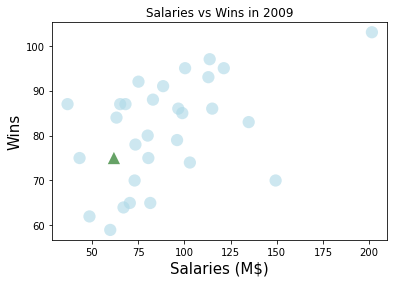

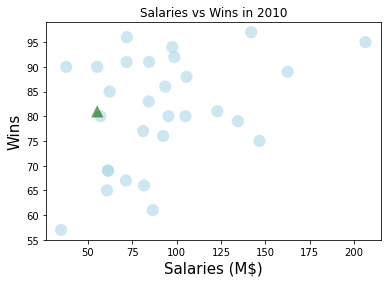

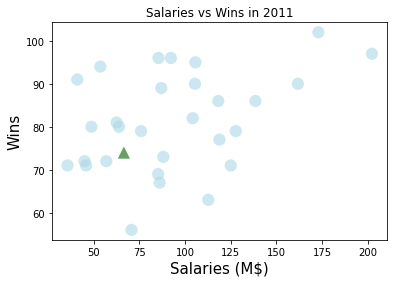

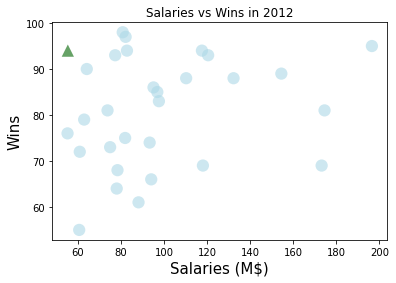

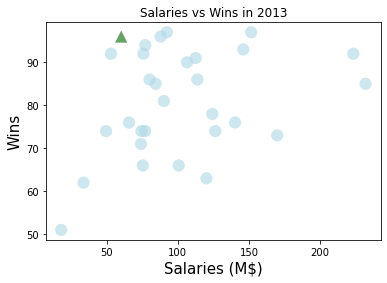

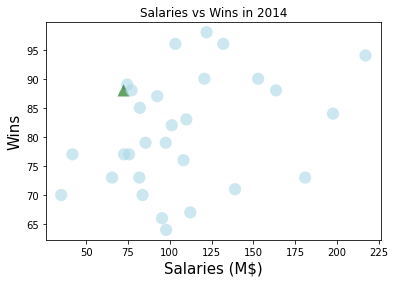

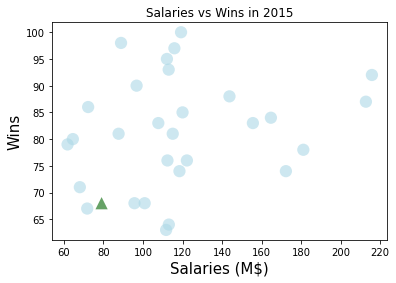

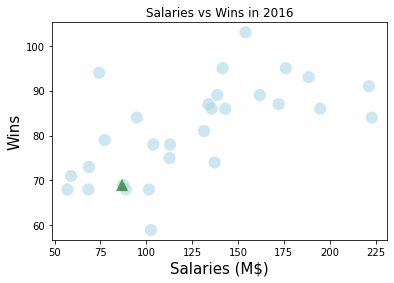

<Figure size 432x288 with 0 Axes>

In [14]:
for i in range(2006,2017):
    plotYear(i)
    plt.figure()
 #   plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [5]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
* 1a<br>
The zipfile is saved in directory `data` that is created when missing. After extracting the zipfile `salaries.csv` is found using `os.walk()` and read into a dataframe. As `teams.csv` occurs in two directories the relevant is found using `os.walk()` (argument = dirname of salaries file) and read into a dataframe. 
* 1b<br>
Using groupby teamID and yearID the total salaries for each team for each year are stored in a new dataframe
* 1c<br>
Pandas' merge is used to combine the summarized salaries and summarized wins; both on teamID and yearID
* 1d<br>
Initially thought line plots will do. Changed to scatter plot to view OAK in relation to the other teams based on total salaries vs total wins for a given year. Couldn't implement conditional scatterplot markers using comprehensive lists; so had to loop over each point.
* 1e<br>
Not done as I lack the knowledge (yet) and am not an AC209 student. Let alone a Harvard student ;-)

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [15]:
# Not requested but downloaded the file (raw GitHub version)
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
countries_file = requests.get(url)
if not os.path.exists('data'):
    os.makedirs('data')
open('data/countries.csv', 'wb').write(countries_file.content)
countries = pd.read_csv('data/countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [16]:
#Regions
countries.Region.nunique()
print(countries.Region.unique())

['AFRICA' 'ASIA' 'EUROPE' 'NORTH AMERICA' 'OCEANIA' 'SOUTH AMERICA']


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

The 2014 Income per person link is not actual. September 2020: Downloaded latest version from https://www.gapminder.org/data/ found the latest version which was downloaded to the `data` directory.

In [17]:
income = pd.read_excel('data/income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [18]:
#your code here
transformed_income = income.transpose()
transformed_income.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,603,667,715,1200,618,757,1640,514,817,1850,...,3280,1980,1810,502,585,1210,778,877,663,869
1801,603,667,716,1200,620,757,1640,514,822,1850,...,3280,2020,1810,502,586,1200,778,879,665,870
1802,603,667,717,1200,623,757,1650,514,826,1860,...,3300,2050,1820,502,586,1200,778,882,667,871
1803,603,667,718,1200,626,757,1650,514,831,1870,...,3190,2020,1830,502,586,1190,778,884,668,872


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

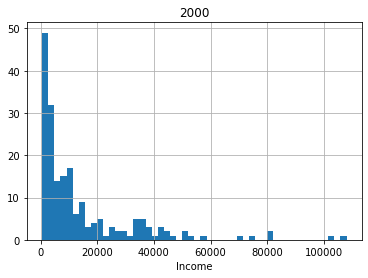

In [19]:
#your code here
def plotIncomeYear(year):
    income2=income.set_index('country', drop=False)
    year_column=income2.loc['Afghanistan':'Zimbabwe',[year]]
    year_column.hist(bins=50)
    plt.xlabel('Income')
    
plotIncomeYear(2000)

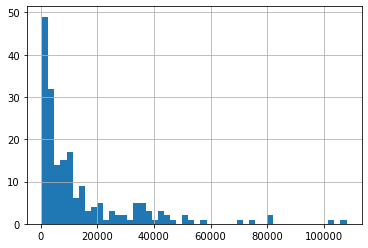

In [20]:
def plotTransposedIncomeYear(year):
    transformed_income.loc[year].hist(bins=50)
 
    
plotTransposedIncomeYear(2000)

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [21]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    income2=income.set_index('country', drop=False)
    income_year=income2.loc['Afghanistan':'Zimbabwe',[year]]
    merged = pd.merge(countries, income_year, how='inner', left_on='Country', right_on='country')
    return merged

mergeByYear(2010)

,Country,Region,2010
0,Algeria,AFRICA,12900
1,Angola,AFRICA,6360
2,Benin,AFRICA,1820
3,Botswana,AFRICA,13200
4,Burundi,AFRICA,734
...,...,...,...
170,Paraguay,SOUTH AMERICA,9740
171,Peru,SOUTH AMERICA,10100
172,Suriname,SOUTH AMERICA,14100
173,Uruguay,SOUTH AMERICA,17200


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

<br>Income data is collected by Region. Using the boxplots gives the statistical values median, upper quartile, lower quartile, maximum value and minimum value for each Region. The outliers are displayed too: values > 1,5 * IQR from the box boundary. Independent of the chosen range, one might observe that poor regions remain poor.

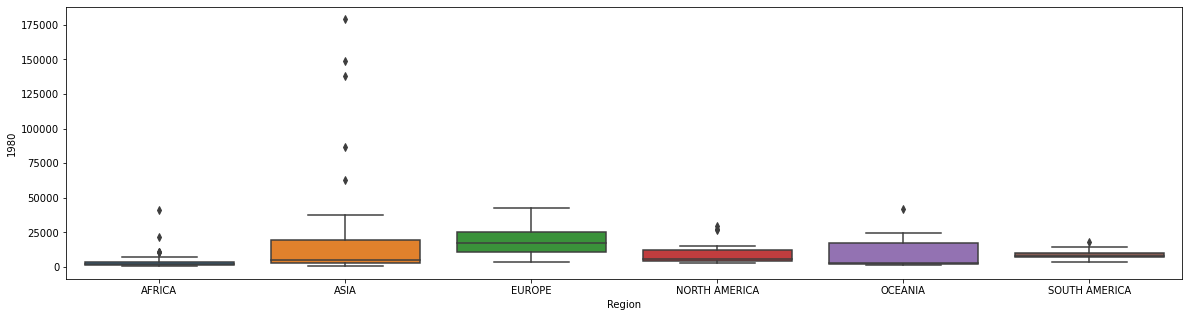

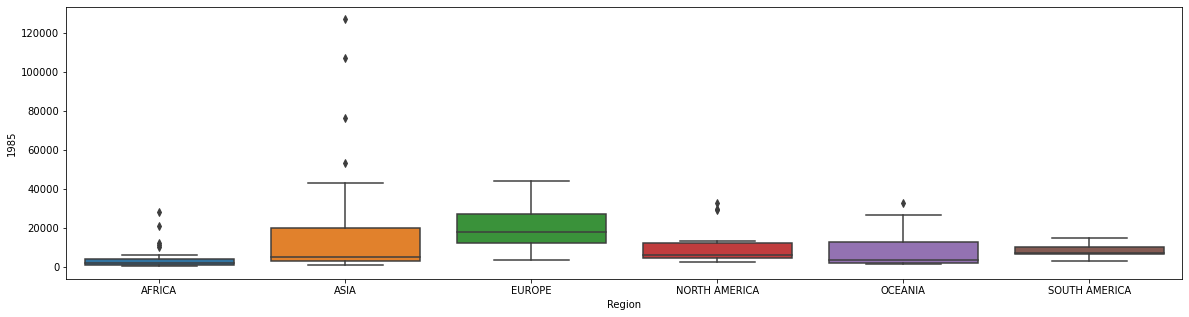

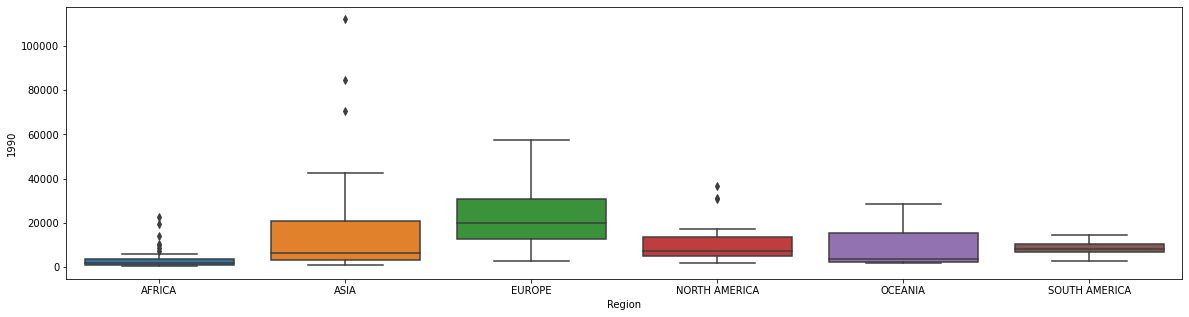

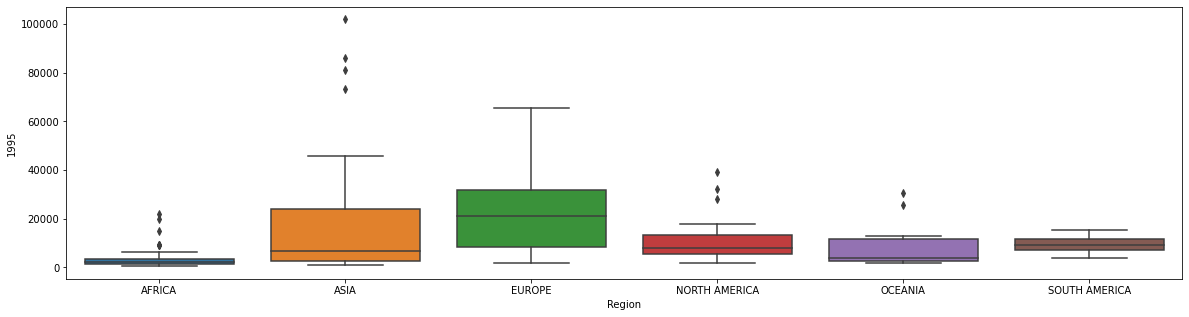

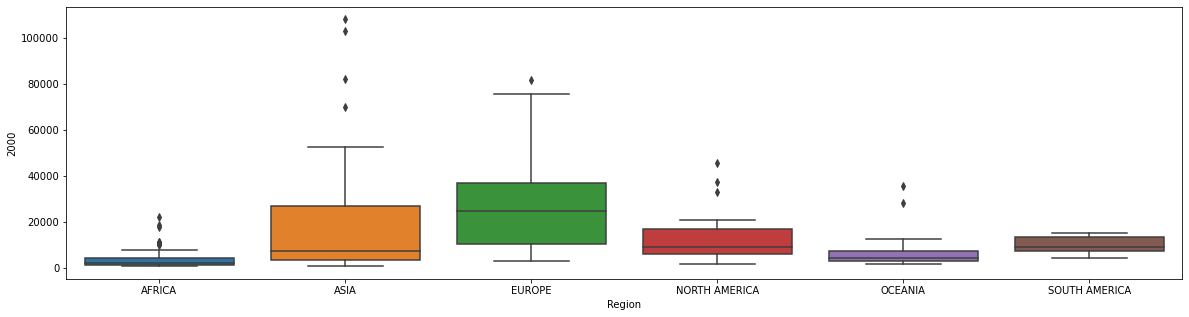

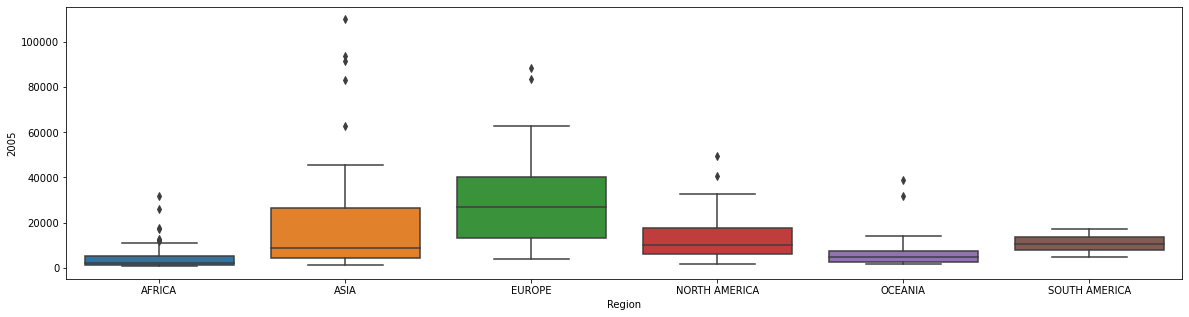

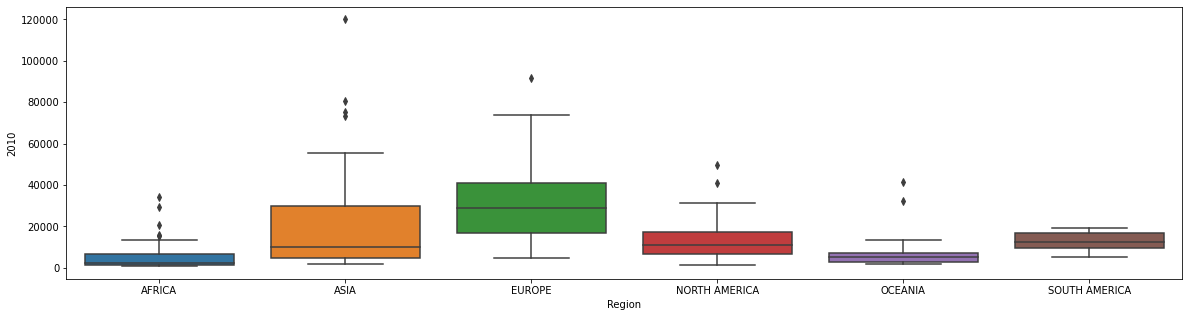

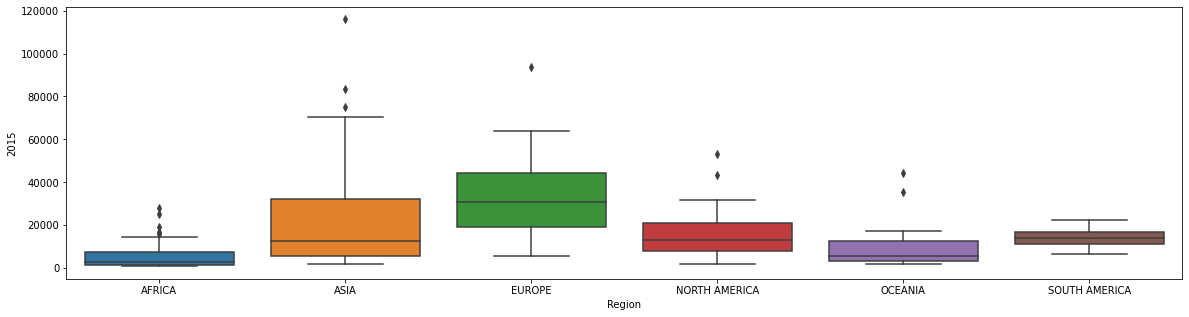

In [22]:
#your code here
def incomePerPersonRegionInYear(year):
    df_ipy = mergeByYear(year)
    plt.figure(figsize=(20,5))
    sns.boxplot(x=df_ipy['Region'], y=df_ipy[year])
    plt.show()

for i in range(1980, 2020, 5):
    incomePerPersonRegionInYear(i)

<br>The mean income per person per region displayed in one figure. Displaying year range 1950 to 2020:
* between 1970 and 1980 income per person Asia > Europe
* roughly around 1975 income per person Oceania reaches it's max. Until now this max has not been surpassed.

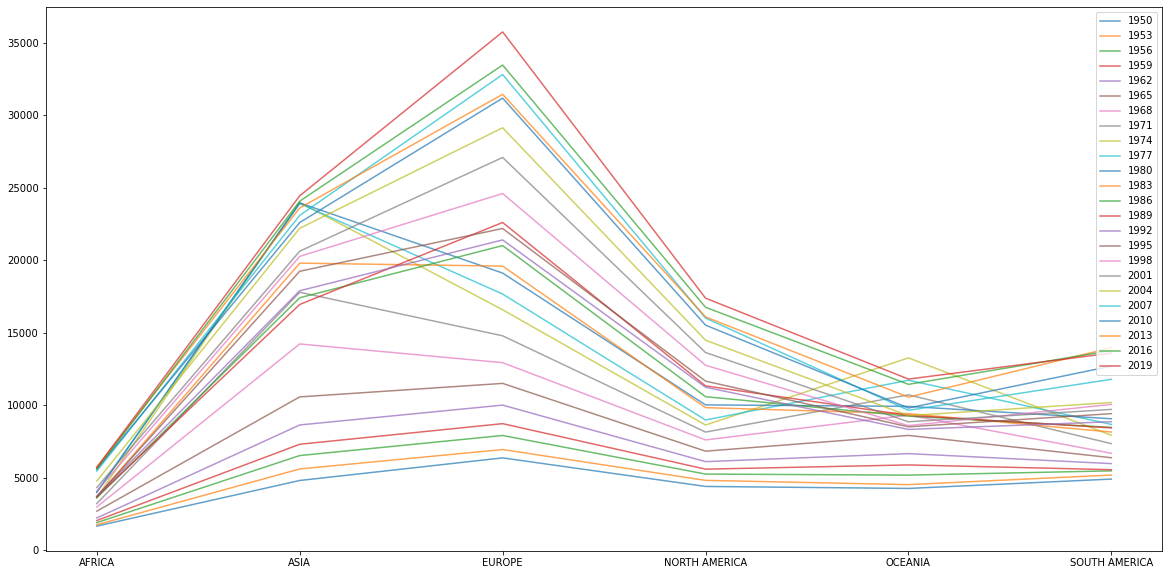

In [23]:
for year in range(1950, 2020, 3):
    df = mergeByYear(year)
    df_mean = df.groupby('Region', as_index=False).mean()
    plt.rcParams["figure.figsize"] = [20,10]
    plt.plot(df_mean['Region'], df_mean[year], alpha=0.7, label=year)
    plt.legend(loc="upper right")
    

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
* 2a<br>
Use raw data from the Github site to get `countries.csv`. Time consuming task to browse the internet for the latest income per person dataset.
* 2b<br>
Two ways to plot income per capita across all countries for a certain year.
* 2c<br>
Used pd.merge() to join countries and income datasets.
* 2d<br>
Never heard of boxplots before. Perhaps mismatch between 2015 labs and lectures and 2014 HW assumed knowledge? Anyway managed to get the boxplots per region for a year. Added mean values of income per capita per region to view in one figure.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function (PDF), cumulative distribution function (CDF) and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [24]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
# Normal distribution. Take functions from scipy.stats.norm().
def ratioNormals(diff, a):
    #The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
    X = stats.norm(loc = diff, scale = 1) # mean: difference between average X and average Y; stddev = 1.
    Y = stats.norm(loc = 0, scale = 1) # mean is 0 and stddev = 1 both as given in problem description.
    return X.sf(a) / Y.sf(a)
    

Text(0.5, 1.0, 'Ratio of proportions Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y')

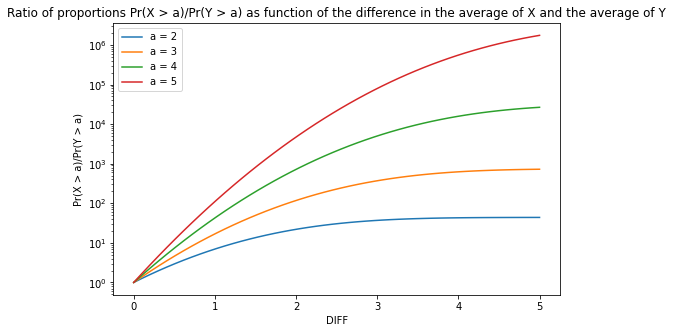

In [25]:
# Plot the curve for different 'a' values as a function of the difference in the average of X and the average of Y
cutoff_values = range(2, 6)
diffs = np.linspace(0, 5) #  evenly spaced numbers over a specified interval. Default # of samples to create is 50
plt.figure(figsize=(8,5));
for a in cutoff_values:
    ratios = [ratioNormals(d, a) for d in diffs]
    plt.plot(diffs, ratios)
# To see results better, plot Y logarithmic
plt.legend(['a = {}'.format(a) for a in cutoff_values])
plt.yscale('log')
plt.xlabel('DIFF')
plt.ylabel('Pr(X > a)/Pr(Y > a)')
plt.title('Ratio of proportions Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [26]:
#your code here
merged = mergeByYear(2012)
merged_mean = merged.groupby('Region', as_index=False).mean()
merged_ASA = merged_mean[(merged_mean.Region == 'ASIA') | (merged_mean.Region =='SOUTH AMERICA')] 
#merged_ASA[2012] = np.round(merged_ASA[2012],2)
merged_ASA

,Region,2012
1,ASIA,23436.756757
5,SOUTH AMERICA,13570.833333


Clearly the average Asian income is higher than the South American. Presenting both regions in boxplots (median, upper quartile, lower quartile, maximum value and minimum value) results in a different view on income per person. See below.

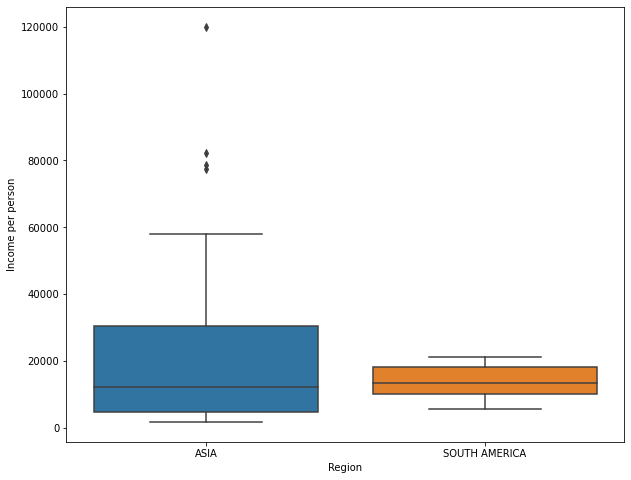

In [27]:
merged = mergeByYear(2012)
merged_ASA = merged[(merged.Region == 'ASIA') | (merged.Region =='SOUTH AMERICA')] 
plt.figure(figsize=(10,8))
sns.boxplot(x=merged_ASA['Region'], y=merged_ASA[2012])
#plt.yscale('log')
plt.ylabel('Income per person')
plt.show()

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [28]:
#your code here
def ratioIncome(df, region):
    df_region = df[df.Region == region]
    countriesAbove10000 = len(df_region[df_region[df.columns[2]] > 10000])
    ratio = countriesAbove10000 / len(df_region) * 100
    return np.round(ratio,2)

merged = mergeByYear(2012)
for c in ['ASIA', 'SOUTH AMERICA']:
    print('Ratio P(X > 10000) in ', c, 'is ', ratioIncome(merged, c), '%')
    


Ratio P(X > 10000) in  ASIA is  54.05 %
Ratio P(X > 10000) in  SOUTH AMERICA is  75.0 %


Region SOUTH AMERICA has more countries with income per person > 10000. Looking at the 3(b) outcome the expectation was that ASIA has a higher ratio. Asia's boxplot max figures indicate probably no normal distribution in that region. 

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
---
For me Problem 3 was by far the most challenging one of HW1 (CS109-2014): missing a prerequisite like Stat 100 or above and after more than 30 years almost no theoretical knowledge made Joe Blitzstein's lecture 5 (CS-109 2015) a tough one to understand. <br><br>
Thanks to the boxplot from 3(b) it is clear that Asia lacks a nice bell curve. Asia has outliers resulting in a higher mean than South America. Problem 3(c) shows a much higer ratio P(X > 10000) for South America. Another indication that it is more likely South America has a nicer bell curve. <br><br>
Problem 3(d) not done because I am not an AC209 student. Let alone a Harvard student ;-)